In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
path = 'C:/Users/ss230/Documents/Python/Stars/star.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [5]:
column_names = df.columns[:-1]

In [6]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [7]:
df['Color'] = df['Color'].str.replace('yellowish', 'Yellowish')
df['Color'] = df['Color'].str.replace('yellow-white', 'White-Yellow')
df['Color'] = df['Color'].str.replace('Yellowish White', 'White-Yellow')
df['Color'] = df['Color'].str.replace('Blue white', 'Blue-White')
df['Color'] = df['Color'].str.replace('Blue White', 'Blue-White')
df['Color'] = df['Color'].str.replace('white', 'White')
df['Color'] = df['Color'].str.replace('Whitish', 'White')

In [8]:
df['Color'].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Pale yellow orange',
       'Blue', 'Orange', 'Yellowish', 'Orange-Red'], dtype=object)

In [9]:
df['Color_Num'] = pd.factorize(df['Color'])[0] + 1

In [10]:
df['Color_Num'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
df['Spec_Class_Num'] = pd.factorize(df['Spectral_Class'])[0] + 1

In [12]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Num,Spec_Class_Num
0,3068,0.002400,0.1700,16.12,Red,M,0,1,1
1,3042,0.000500,0.1542,16.60,Red,M,0,1,1
2,2600,0.000300,0.1020,18.70,Red,M,0,1,1
3,2800,0.000200,0.1600,16.65,Red,M,0,1,1
4,1939,0.000138,0.1030,20.06,Red,M,0,1,1
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,6,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,6,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5,3,3
238,9235,404940.000000,1112.0000,-11.23,White,A,5,3,3


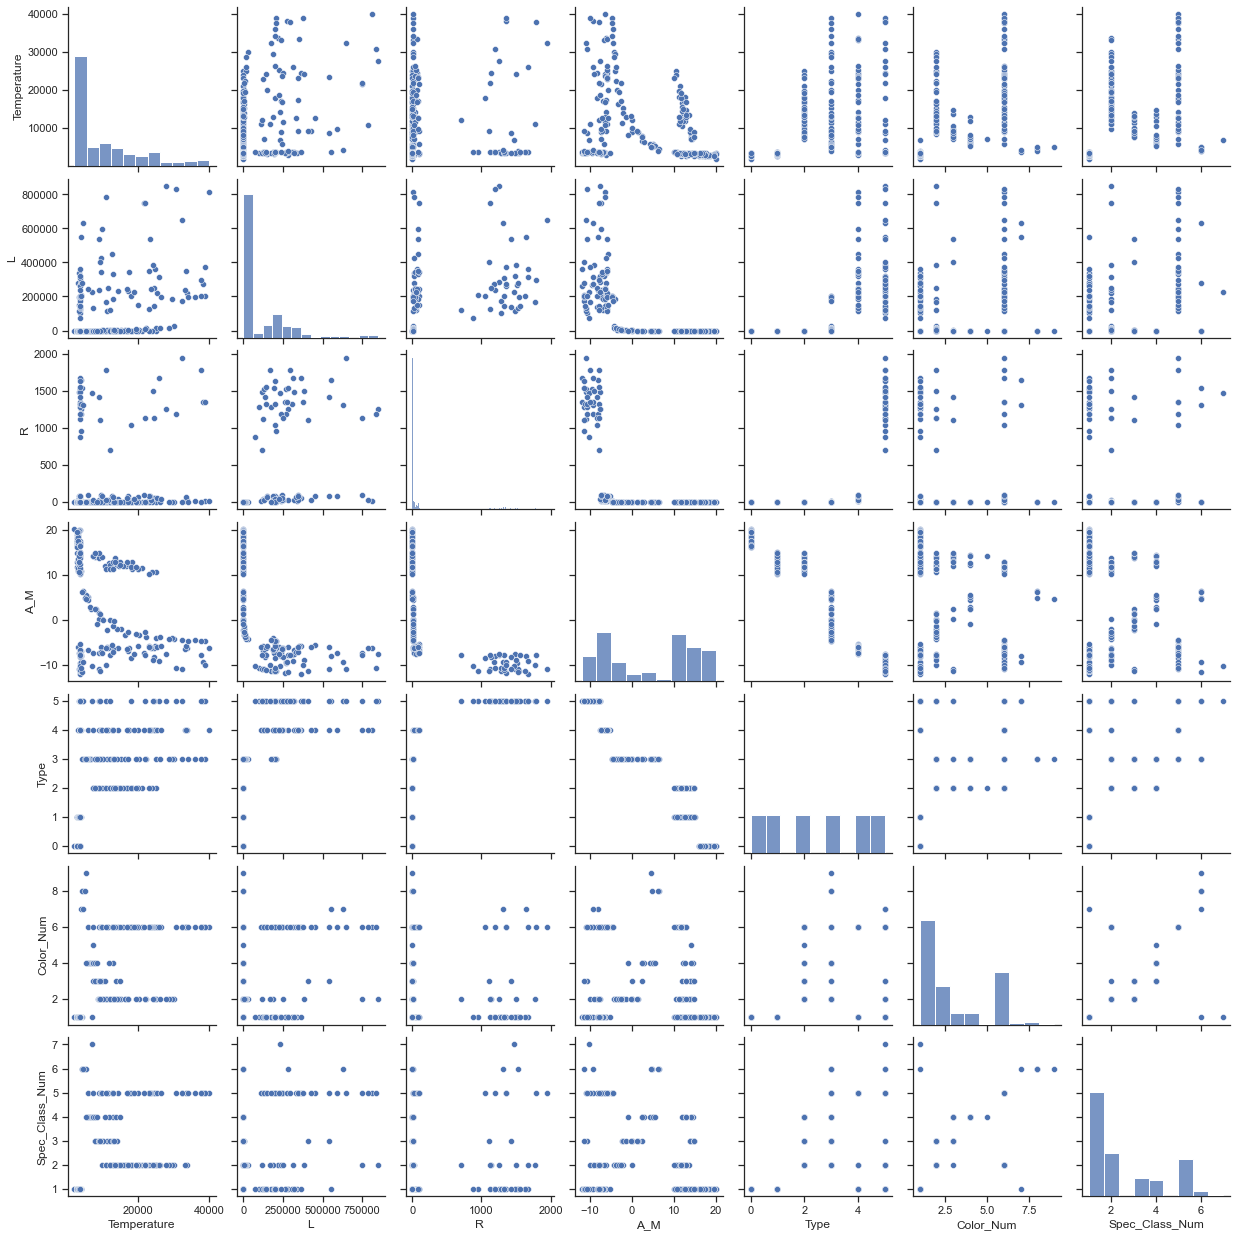

In [15]:
sns.set(style="ticks")
sns.pairplot(df)

plt.show()

In [16]:
mapping_spectral_class = dict(zip(df['Spectral_Class'], df['Spec_Class_Num']))
mapping_color = dict(zip(df['Color'], df['Color_Num']))

In [17]:
print(mapping_color)
print(mapping_spectral_class)

{'Red': 1, 'Blue-White': 2, 'White': 3, 'White-Yellow': 4, 'Pale yellow orange': 5, 'Blue': 6, 'Orange': 7, 'Yellowish': 8, 'Orange-Red': 9}
{'M': 1, 'B': 2, 'A': 3, 'F': 4, 'O': 5, 'K': 6, 'G': 7}


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
X = df[['Temperature', 'L', 'R', 'A_M', 'Color_Num', 'Spec_Class_Num']]
y = df['Type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [24]:
Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [25]:
Prediction

,Actual,Predicted
24,2,2
6,0,0
93,3,3
109,4,4
104,4,4
172,5,5
233,5,5
86,2,2
9,0,0
143,2,2


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
cm = confusion_matrix(y_test, y_pred)

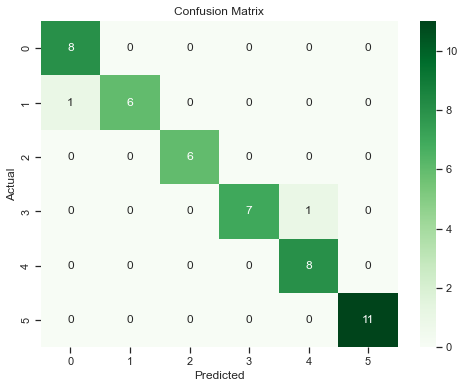

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()